In [48]:
# import numpy as np                # use for array and matrix stuff
import pandas as pd               # use for dataframes, think of it as excel
# import math
# import matplotlib as mpl
import matplotlib.pyplot as plt   # use to make graphs
# import seaborn as sns
# from collections import Counter
# import helpers
# # import graphs
# import matplotlib.ticker as mtick
# import functools
# from textwrap import wrap
# import re
from wordcloud import WordCloud

In [19]:
df_dhp = pd.read_csv('')
df_school = pd.read_csv('school.csv')

In [38]:
def create_wordcloud(
    df,                         # pandas dataframe, shown in format below
    column_name,                # column name in dataframe

    file_name = None,           # name of the wordcloud image
    width: int = 1280,           # width of the image
    height: int = 720,          # height of the image
    background_color = 'white', # str: colours or hex representation of colour. Use None for transparent background, but this doesn't work
    include_numbers = True,     # include numbers when plotting words in wordcloud
    stopwords = None,           # set. Pass in a set of words to ignore. Ex: ('The', 'it', 'a', 'because', ...) If None, default stopwords are used,
    drop_values = []
):
    """
    Dataframe input format:
    +-------------+
    | column_name |
    +-------------+
    | string 1    |
    | string 2    |
    | string 3    |
    | ...         |
    +-------------+
    """
    if(df[column_name].isnull().values.any()):
        df[column_name] = df[column_name].dropna(axis=0)

    count = Counter()
    column_values = helpers.splice_cells_with_commas(df, column_name)
    for i in column_values:
        count[i] += 1
        
    if(drop_values):
        for i in drop_values:
            if(i in count):
                del count[i]
    
    wordcloud = WordCloud(
        width = width, 
        height = height, 
        background_color = background_color,
        include_numbers = include_numbers,
        stopwords = stopwords,
        colormap = 'Dark2'
    ).generate_from_frequencies(count)

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")

    if(not file_name):
        file_name = str(column_name)
    wordcloud.to_file('./graphs/' + file_name + '_wordmap.png')

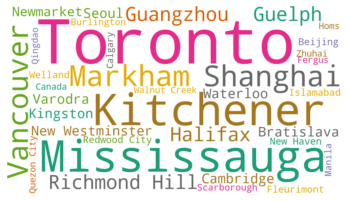

In [32]:
df_birth_loc = df_dhp[['birth_location']]
df_birth_loc = df_birth_loc.dropna()
df_birth_loc['birth_location'] = df_birth_loc['birth_location'].map(lambda x: x.split(',')[0])

create_wordcloud(
    df_birth_loc,
    'birth_location'
)

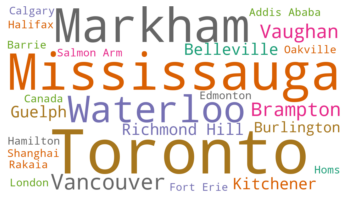

In [33]:
df_hometown_loc = df_dhp[['hometown_location']]
df_hometown_loc = df_hometown_loc.dropna()
df_hometown_loc['hometown_location'] = df_hometown_loc['hometown_location'].map(lambda x: x.split(',')[0])

create_wordcloud(
    df_hometown_loc,
    'hometown_location'
)

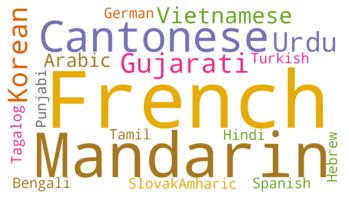

In [40]:
df_number_languages = df_dhp[['number_languages']]
df_number_languages = df_number_languages.dropna()

create_wordcloud(
    df_number_languages,
    'number_languages',
    drop_values = ['English']
)

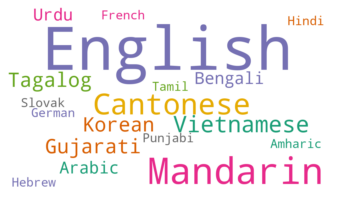

In [41]:
df_languages = df_dhp[['languages']]
df_languages = df_languages.dropna()

create_wordcloud(
    df_languages,
    'languages',
    file_name = 'langauges_spoken_at_home'
)

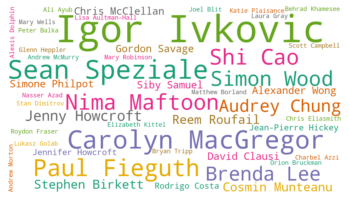

In [31]:
df_fav_profs = df_school[['fav_profs']]
df_fav_profs = df_fav_profs.dropna()

create_wordcloud(
    df_fav_profs,
    'fav_profs'
)

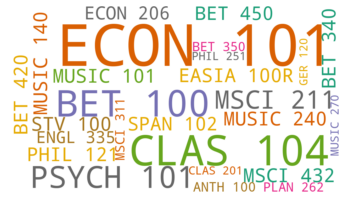

In [47]:
course_list = [
    'te',
    'cse',
    'fav_core',
    'least_fav_core',
    'fav_te',
    'least_fav_te',
    'fav_cse',
    'least_fav_cse'
]

for course in course_list:
    df_temp = df_school[[course]]
    df_temp = df_temp.dropna()
    
    create_wordcloud(
        df_temp,
        course
    )